In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm


sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
import gsw
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)

rows = 720
cols = 600


['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


In [7]:
vars = ["budg2d_hflux_set1", "state_3D_mon_snap", "budg2d_snap_set1", "TS_AW_daily_snap", "budg2d_zflux_set1","EtaN_day_snap","TS_surf_daily_snap",
"budg2d_zflux_set2", "EtaN_mon_mean", "vel_3D_mon_mean","budg3d_hflux_set2", "exf_zflux_set1", "vel_3D_mon_snap",
"budg3d_kpptend_set1",
"budg3d_zflux_set2", "SI_daily_snap", "state_3D_mon_mean"]
path = '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/'


In [3]:
#budg2d_hflux_set1 state_3D_mon_snap budg2d_snap_set1 TS_AW_daily_snap budg2d_zflux_set1 EtaN_day_snap TS_surf_daily_snap budg2d_zflux_set2 EtaN_mon_mean vel_3D_mon_mean budg3d_hflux_set2 exf_zflux_set1 vel_3D_mon_snap budg3d_kpptend_set1 budg3d_zflux_set2 SI_daily_snap state_3D_mon_mean

In [4]:
vars_2d = ['EtaN_day_snap','EtaN_mon_mean','SI_daily_snap','TS_surf_daily_snap','TS_AW_daily_snap','budg2d_zflux_set1','budg2d_zflux_set2','budg2d_hflux_set1','budg2d_snap_set1','exf_zflux_set1']

vars_3d = np.setxor1d(vars, vars_2d)

In [5]:
vars_3d

array(['budg3d_hflux_set2', 'budg3d_kpptend_set1', 'budg3d_zflux_set2',
       'state_3D_mon_mean', 'state_3D_mon_snap', 'vel_3D_mon_mean',
       'vel_3D_mon_snap'], dtype='<U19')

In [6]:

# #--
#   fields(1,1) = 'ETAN    ',
#   fileName(1) = 'diags/EtaN_day_snap/EtaN_day_snap',
#   frequency(1) =  -86400.,
# #--
#   fields(1,2) = 'ETAN    ',
#   fileName(2) = 'diags/EtaN_mon_mean/EtaN_mon_mean',
#   frequency(2) =  2592000.,
# #
#   fields(1:5,3) = 'SIarea  ','SIheff  ','SIhsnow ','SIuice ','SIvice ',
#   fileName(3) = 'diags/SI_daily_snap/SI_daily_snap',
#   frequency(3) = -86400.,
# #
#   fields(1:2,4) = 'THETA   ','SALT    ',
#   fileName(4) = 'diags/TS_surf_daily_snap/TS_surf_daily_snap',
#   frequency(4) = -86400.,
#   levels(:,4) = 1,
# #
#   fields(1:2,5) = 'THETA   ','SALT    ',
#   fileName(5) = 'diags/TS_AW_daily_snap/TS_AW_daily_snap',
#   frequency(5) = -86400.,
#   levels(:,5) = 31,
# #
#   fields(1:2,6) = 'THETA   ','SALT    ',
#   fileName(6) = 'diags/state_3D_mon_snap/state_3D_mon_snap',
#   frequency(6) = -2592000.,
# #
#   fields(1:2,7) = 'UVEL    ','VVEL    ',
#   fileName(7) = 'diags/vel_3D_mon_snap/vel_3D_mon_snap',
#   frequency(7) = -2592000.,
# #
#   fields(1:2,8) = 'THETA   ','SALT    ',
#   fileName(8) = 'diags/state_3D_mon_mean/state_3D_mon_mean',
#   frequency(8) = 2592000.,
# #
#   fields(1:2,9) = 'UVEL    ','VVEL    ',
#   fileName(9) = 'diags/vel_3D_mon_mean/vel_3D_mon_mean',
#   frequency(9) = 2592000.,
# #
#   fields(1:10,10) = 'UVELMASS','VVELMASS','ADVx_TH ','ADVy_TH ','DFxE_TH ','DFyE_TH ','ADVx_SLT','ADVy_SLT','DFxE_SLT','DFyE_SLT',
#   fileName(10) = 'diags/budg3d_hflux_set2/budg3d_hflux_set2',
#   frequency(10) = 2592000.,
# #
#   fields(1:6,11) = 'ADVr_TH ','DFrE_TH ','DFrI_TH ', 'ADVr_SLT','DFrE_SLT','DFrI_SLT',
#   fileName(11) = 'diags/budg3d_zflux_set2/budg3d_zflux_set2',
#   frequency(11) = 2592000.,
# #
#   fields(1:5,12) = 'KPPg_TH ','KPPg_SLT','oceSPtnd','AB_gT   ','AB_gS   ',
#   fileName(12) = 'diags/budg3d_kpptend_set1/budg3d_kpptend_set1',
#   frequency(12) = 2592000.,
# #
#   fields(1:7,13) = 'oceFWflx','SIatmFW ','TFLUX   ','SItflux ','SFLUX   ','oceQsw  ','oceSPflx',
#   fileName(13) = 'diags/budg2d_zflux_set1/budg2d_zflux_set1',
#   frequency(13) = 2592000.,
# #
#   fields(1:10,14) = 'SRELAX  ','TRELAX  ','WTHMASS ','WSLTMASS','oceSflux','oceQnet ','SIatmQnt','SIaaflux','SIsnPrcp','SIacSubl',
#   fileName(14) = 'diags/budg2d_zflux_set2/budg2d_zflux_set2',
#   frequency(14) = 2592000.,
# #
#   fields(1:4,15) = 'ADVxHEFF','ADVyHEFF','ADVxSNOW','ADVySNOW',
#   fileName(15) = 'diags/budg2d_hflux_set1/budg2d_hflux_set1',
#   frequency(15) = 2592000.,
# #
#   fields(1:6,16) = 'ETAN    ','SIheff  ','SIhsnow ','SIarea  ','sIceLoad','PHIBOT  ',
#   fileName(16) = 'diags/budg2d_snap_set1/budg2d_snap_set1',
#   frequency(16) = -2592000.,
# ##
#   fields(1:10,17) = 'EXFpreci','EXFevap ','EXFroff ','EXFempmr','EXFswdn ','EXFlwdn ','EXFswnet','EXFlwnet','EXFqnet ','EXFatemp',
#   fields(11:18,17) = 'EXFaqh  ','EXFtaux ','EXFtauy ','EXFuwind','EXFvwind','EXFpress','EXFhs   ','EXFhl   ',
#   fileName(17) = 'diags/exf_zflux_set1/exf_zflux_set1',
#   frequency(17) = 2592000.,


In [8]:
sec_itr_1080 = 300 #need updated
def date_to_iter_number(date,seconds_per_iter = 60):

    total_seconds = (date-datetime(1992,1,1)).total_seconds()
    iter_number = total_seconds/seconds_per_iter
    # print(iter_number)
    return(iter_number)

def iter_number_to_date(iter_number,seconds_per_iter=60):

    total_seconds = iter_number*seconds_per_iter
    date = datetime(1992,1,1) + dt.timedelta(seconds=total_seconds)
    # print(date)
    return(date)

In [25]:
k_num=60

In [26]:

print('starting 2D files')
sub_var_number = {'EtaN_day_snap':1,'EtaN_mon_mean':1,'SI_daily_snap':5,'TS_surf_daily_snap':2,'TS_AW_daily_snap':2,'budg2d_zflux_set1':7,'budg2d_zflux_set2':10,'budg2d_hflux_set1':4,'budg2d_snap_set1':6,'exf_zflux_set1':18}
sub_var = [['ETAN'],['ETAN'],['SIarea','SIheff','SIhsnow','SIuice','SIvice'],['THETA','SALT'],['THETA','SALT'],['oceFWflx','SIatmFW','TFLUX','SItflux','SFLUX','oceQsw','oceSPflx'],['SRELAX','TRELAX','WTHMASS','WSLTMASS','oceSflux','oceQnet','SIatmQnt','SIaaflux','SIsnPrcp','SIacSubl'],['ADVxHEFF','ADVyHEFF','ADVxSNOW','ADVySNOW'],['ETAN','SIheff','SIhsnow','SIarea','sIceLoad','PHIBOT'],['EXFpreci','EXFevap','EXFroff','EXFempmr','EXFswdn','EXFlwdn','EXFswnet','EXFlwnet','EXFqnet','EXFatemp','EXFaqh','EXFtaux','EXFtauy','EXFuwind','EXFvwind','EXFpress','EXFhs','EXFhl']]
for var in tqdm(range(0,len(vars_2d))):
    file_files, file_filepaths = tools.get_data_paths_from_binary(path, vars_2d[var], file_end = 'data' )
    shape = (1,sub_var_number[vars_2d[var]],rows,cols)
    for f in range(0,len(file_files)): 
        iter_num = file_files[f].split('.')[1]
        time = [iter_number_to_date(int(iter_num))]
        dims = ['time','variables','rows','cols']
        coords = [time,sub_var[var],np.arange(rows),np.arange(cols)]
        tools.convert_binary_to_nc(file_files[f],file_filepaths[f],shape,dims,coords,vars_2d[var],output_filepath=path+'nc_files/'+vars_2d[var]+'/'+vars_2d[var]+'_'+iter_num+'.nc')
print('done, starting 3D files')
#3d files
sub_var_number_3d = {'budg3d_hflux_set2':10, 'budg3d_kpptend_set1':5, 'budg3d_zflux_set2':6,
       'state_3D_mon_mean':2, 'state_3D_mon_snap':2, 'vel_3D_mon_mean':2,
       'vel_3D_mon_snap':2}
sub_var_3d = [['UVELMASS','VVELMASS','ADVx_TH ','ADVy_TH ','DFxE_TH ','DFyE_TH ','ADVx_SLT','ADVy_SLT','DFxE_SLT','DFyE_SLT'],['KPPg_TH ','KPPg_SLT','oceSPtnd','AB_gT','AB_gS'],['ADVr_TH','DFrE_TH','DFrI_TH', 'ADVr_SLT','DFrE_SLT','DFrI_SLT'],['THETA','SALT'],['THETA','SALT'],['UVEL','VVEL'],['UVEL','VVEL']]
for var in tqdm(range(0,len(vars_3d))):
    file_files, file_filepaths = tools.get_data_paths_from_binary(path, vars_3d[var], file_end = 'data' )
    shape = (1,sub_var_number_3d[vars_3d[var]],k_num,rows,cols)
    for f in range(0,len(file_files)): 
        iter_num = file_files[f].split('.')[1]
        time = [iter_number_to_date(int(iter_num))]
        dims = ['time','variables','k','rows','cols']
        coords = [time,sub_var_3d[var],np.arange(k_num),np.arange(rows),np.arange(cols)]
        tools.convert_binary_to_nc(file_files[f],file_filepaths[f],shape,dims,coords,vars_3d[var],output_filepath=path+'nc_files/'+vars_3d[var]+'/'+vars_3d[var]+'_'+iter_num+'.nc')
print('done, concating dailys to month files')

100%|█████████████████████████████████████████████| 7/7 [02:46<00:00, 23.85s/it]


In [24]:
dailys = ['EtaN_day_snap','SI_daily_snap','TS_surf_daily_snap','TS_AW_daily_snap']
for var in tqdm(range(0,len(dailys))):
    file_files, file_filepaths = tools.get_data_paths_from_binary(path, 'nc_files/'+dailys[var], file_end = 'nc' )
    if len(file_files)%30!=0:
        for m in range(0,len(file_files)//30):
            to_concat = xr.open_mfdataset(file_filepaths[m*30:m*30+29])
            iter = file_files[m*30+29].split('_')[-1].split('.')[0]
            to_concat.to_netcdf(path+ 'nc_files/Month_'+dailys[var]+'/Month_'+dailys[var]+'_'+iter+'.nc')
        end_thirties = (len(file_files)//30)+30
        remainder = len(file_files)%30
        to_concat_remain = xr.open_mfdataset(file_filepaths[end_thirties:end_thirties+remainder])
        iter_remain = file_files[end_thirties+remainder].split('_')[-1].split('.')[0]
        to_concat_remain.to_netcdf(path+ 'nc_files/Month_'+dailys[var]+'/Month_'+dailys[var]+'_'+iter+'.nc')
    else:
        for m in range(0,len(file_files)//30):
            to_concat = xr.open_mfdataset(file_filepaths[m*30:m*30+29])
            iter = file_files[m*30+29].split('_')[-1].split('.')[0]
            to_concat.to_netcdf(path+ 'nc_files/Month_'+dailys[var]+'/Month_'+dailys[var]+'_'+iter+'.nc')
    

100%|█████████████████████████████████████████████| 4/4 [00:23<00:00,  5.99s/it]


'0001312560'

In [9]:
all_itter = []
for var in tqdm(range(0,len(vars_3d))):
    file_files, file_filepaths = tools.get_data_paths_from_binary(path, vars_3d[var], file_end = 'data' )
    for f in range(0,len(file_files)): 
        iter_num = file_files[f].split('.')[1]
        all_itter.append(iter_num)

100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2311.46it/s]


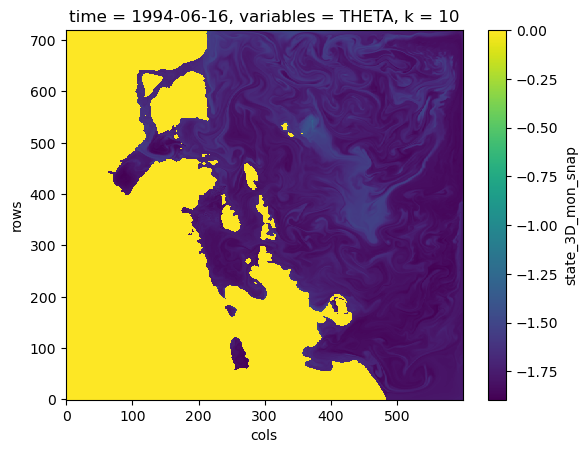

In [15]:
xr.open_dataset(path+'nc_files/'+vars_3d[-3]+'/'+vars_3d[-3]+'_'+all_itter[-1]+'.nc')['state_3D_mon_snap'].isel(time=0,variables=0,k=10).plot()

In [16]:
path = '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/'

file_files, file_filepaths = tools.get_data_paths_from_binary(path, vars_2d[0], file_end = 'data' )

file_files[0].split('.')[1]


['budg2d_hflux_set1', '0001313280', 'data']

In [13]:
vars_2d[var]

'budg2d_hflux_set1'

In [8]:
path = '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/'

TS_snap_files, TS_snap_filepaths = tools.get_data_paths_from_binary(path, 'temp', file_end = 'data' )


In [25]:
TS = np.fromfile(TS_snap_filepaths[0],'>f4')
TS = np.reshape(TS, (2,rows,cols))

In [26]:
720*600

432000

In [9]:
TS_snap_filepaths

['/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008428320.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008431200.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008434080.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008436960.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008439840.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008442720.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008445600.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008448480.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008451360.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008454240.data',
 '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/temp/EtaN_day_snap.0008457120.data',
 '/media/drdarby/Elem

In [15]:
for i in TS_snap_filepaths:
    if i.split('/')[-1].split('.')[0]=='TS_AW_daily_snap':
        print('found')
        TS = np.fromfile(i,'>f4')
        TS = np.reshape(TS, (2,rows,cols))
        T,S = TS[0],TS[1]
        checkT,checkS = np.isfinite(T).sum(),np.isfinite(S).sum()
        if (checkT != rows*cols) or (checkS != rows*cols):
            print('oh no, nan at',i)
    

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [14]:
i.split('/')[-1].split('.')[0](L2_NEGIS) [bdarby@spartan01 run_shelfice]$ mv pickup.0008504640.meta ./pickup.0004252320.meta


['vel_3D_mon_snap', '0008458560', 'data']

array([[ 0.       ,  0.       ,  0.       , ..., -1.8003765, -1.7998253,
        -1.7992797],
       [ 0.       ,  0.       ,  0.       , ..., -1.8312385, -1.8295896,
        -1.8270942],
       [ 0.       ,  0.       ,  0.       , ..., -1.8424911, -1.8433323,
        -1.8432497],
       ...,
       [ 0.       ,  0.       ,  0.       , ..., -1.7209319, -1.7145933,
        -1.7121556],
       [ 0.       ,  0.       ,  0.       , ..., -1.7254502, -1.7185467,
        -1.7139347],
       [ 0.       ,  0.       ,  0.       , ..., -1.7021642, -1.7021022,
        -1.7019956]], dtype=float32)

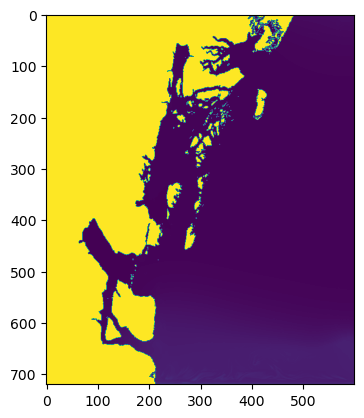

In [31]:
plt.imshow(TS[0])

TS[0]